In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [11]:
#look for linearity - it should be single output & single numeric value
#check the correlation between x and y
# if mutlti corr then check for corr matrix
# multi corr
# if there any outlier use cooks eyq
# standardizaiotn/ normalization > fit the model to check accuracy 

In [3]:
data = pd.read_csv(r"C:\Users\SUMAN\Desktop\ASSIGNMENT- EXCELR\50_Startups.csv")
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
data1 = data.rename({"R&D Spend":"rnd","Administration":"admin","Marketing Spend":"mkts"},axis=1)
data1 = data1[['rnd','admin','mkts','Profit']]

In [6]:
data1

,rnd,admin,mkts,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [7]:
data1.describe()

,rnd,admin,mkts,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [8]:
#correlation analysis
data1.corr()

,rnd,admin,mkts,Profit
rnd,1.000000,0.241955,0.724248,0.972900
admin,0.241955,1.000000,-0.032154,0.200717
mkts,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [9]:
data1.dtypes

rnd       float64
admin     float64
mkts      float64
Profit    float64
dtype: object

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


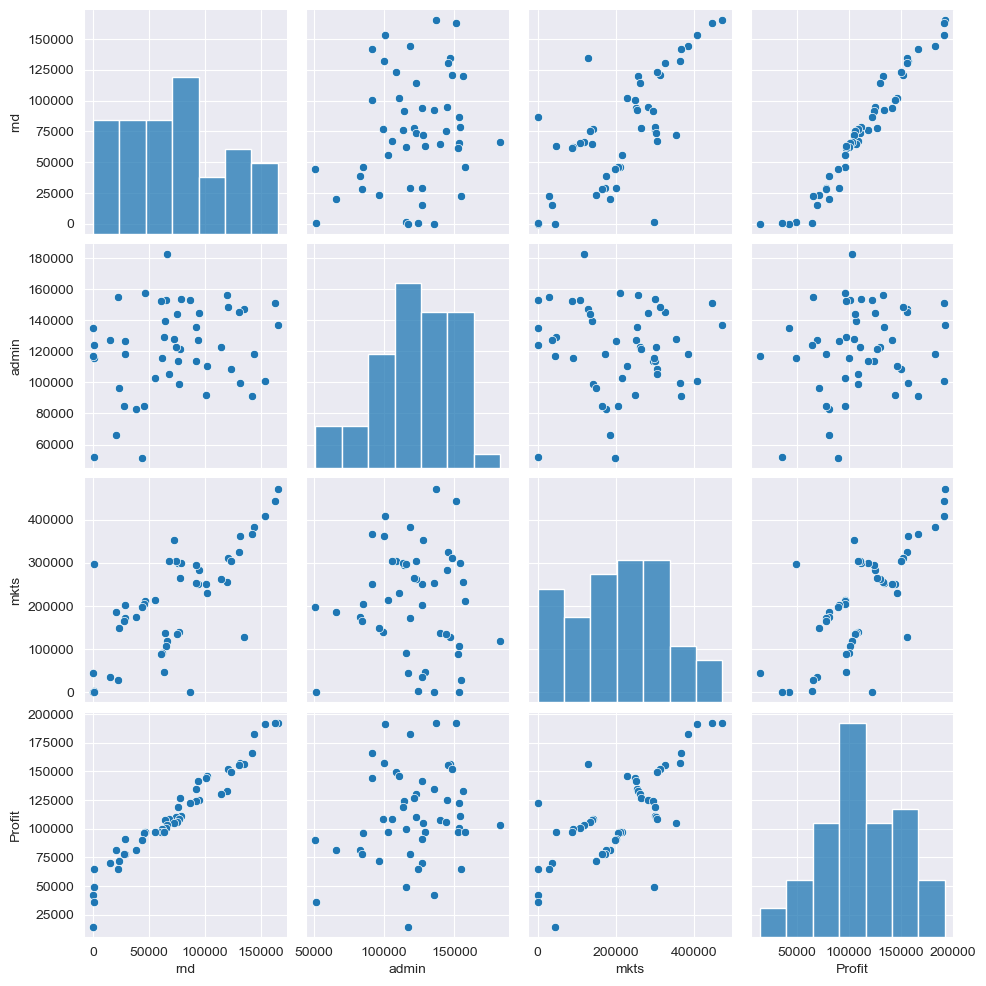

In [10]:
sns.set_style(style = 'darkgrid')
sns.pairplot(data1)

## model building


In [12]:
model = smf.ols("Profit~rnd+admin+mkts",data=data1).fit()

In [13]:
#finding the coefficient parameters
model.params

Intercept    50122.192990
rnd              0.805715
admin           -0.026816
mkts             0.027228
dtype: float64

In [15]:
#finding the tvalues and pvalues
model.tvalues , np.round(model.pvalues,5)

(Intercept     7.626218
 rnd          17.846374
 admin        -0.525507
 mkts          1.655077
 dtype: float64,
 Intercept    0.00000
 rnd          0.00000
 admin        0.60176
 mkts         0.10472
 dtype: float64)

In [16]:
#finding rsquared value
model.rsquared , model.rsquared_adj

(0.9507459940683246, 0.9475337762901719)

In [17]:
# Build SLR and MLR models for insignificant variables 'admin' and 'mkts'
# Also find their tvalues and pvalues

In [18]:
slr_admin = smf.ols("Profit~admin",data=data1).fit()
slr_admin.tvalues, np.round(slr_admin.pvalues,5) 

(Intercept    3.040044
 admin        1.419493
 dtype: float64,
 Intercept    0.00382
 admin        0.16222
 dtype: float64)

In [ ]:
#admin has no significant values

In [21]:
slr_mkts = smf.ols("Profit~mkts",data=data1).fit()
slr_mkts.tvalues, (slr_mkts.pvalues)

(Intercept    7.808356
 mkts         7.802657
 dtype: float64,
 Intercept    4.294735e-10
 mkts         4.381073e-10
 dtype: float64)

In [22]:
#mkts has significant values

In [23]:
mlr_admin_mkts = smf.ols("Profit~admin+mkts",data=data1).fit()
mlr_admin_mkts.tvalues, mlr_admin_mkts.pvalues

(Intercept    1.142741
 admin        2.467779
 mkts         8.281039
 dtype: float64,
 Intercept    2.589341e-01
 admin        1.729198e-02
 mkts         9.727245e-11
 dtype: float64)

# Model validation

# Two method : 1 - Collinearity Check & 2 - Residual Analysis

In [26]:
# 1) Collinearity 
# Calculate VIF(Variance inflation factor) = 1/(1-Rsquare) for all independent variables 
rsq_rnd = smf.ols("rnd~admin+mkts",data=data1).fit().rsquared
vif_rnd = 1/(1-rsq_rnd)

rsq_admin = smf.ols("admin~rnd+mkts",data=data1).fit().rsquared
vif_admin = 1/(1-rsq_admin)

rsq_mkts = smf.ols("mkts~rnd+admin",data=data1).fit().rsquared
vif_mkts = 1/(1-rsq_mkts)

#arranging in dataframe format
d1 = {'Variables':['rnd','admin','mkts'],'Vif':[vif_rnd,vif_admin,vif_mkts]}
Vif_df = pd.DataFrame(d1)
Vif_df

,Variables,Vif
0,rnd,2.468903
1,admin,1.175091
2,mkts,2.326773


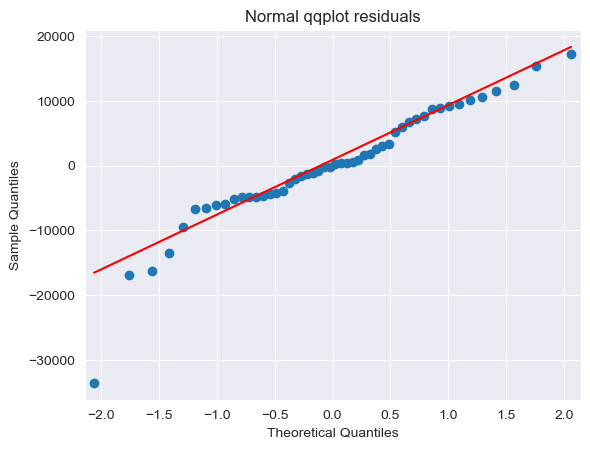

In [27]:
# 2) Residual Analysis
# Test for Normality of Residuals (Q-Q Plot) using residual model (model.resid)

sm.qqplot(model.resid,line = 'q')
plt.title("Normal qqplot residuals")
plt.show()

In [28]:
list(np.where(model.resid<-30000))

[array([49], dtype=int64)]

In [29]:
# Test for Homoscedasticity or Heteroscedasticity (plotting model's standardized fitted values vs standardized residual values)
# User defined z = (x - mu)/sigma

def standard_values(vals):
    return (vals-vals.mean())/vals.std()

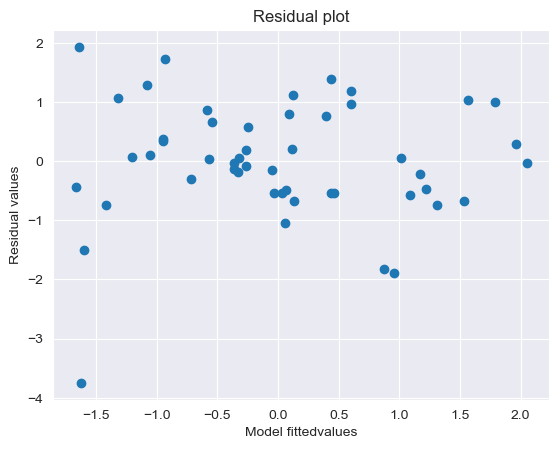

In [30]:
plt.scatter(standard_values(model.fittedvalues),standard_values(model.resid))
plt.title("Residual plot")
plt.xlabel("Model fittedvalues")
plt.ylabel("Residual values")
plt.show()

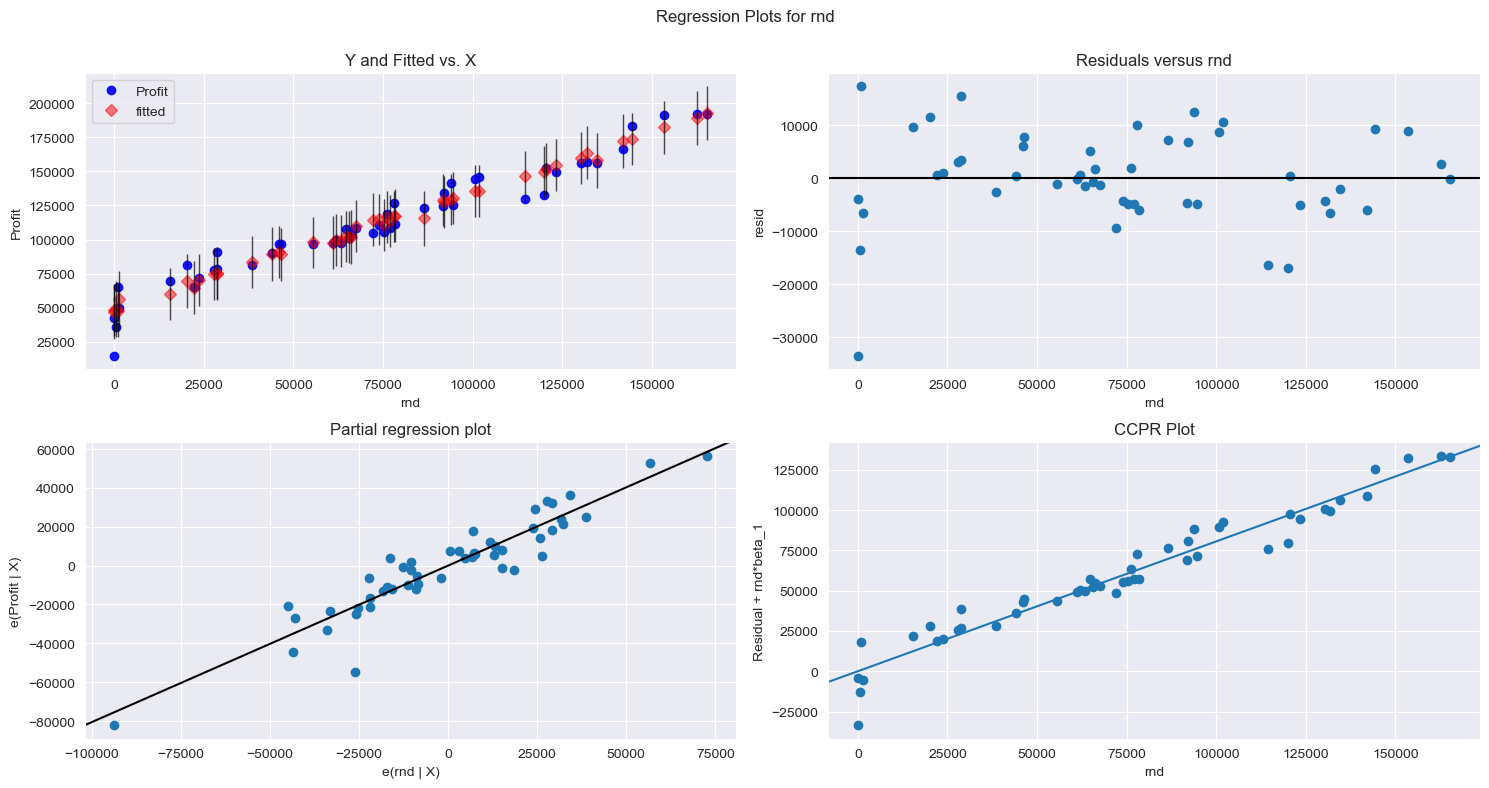

In [31]:
# Test for errors or Residuals Vs Regressors or independent 'x' variables or predictors 
# using Residual Regression Plots code graphics.plot_regress_exog(model,'x',fig)    # exog = x-variable & endog = y-variable

fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'rnd',fig= fig)
plt.show()

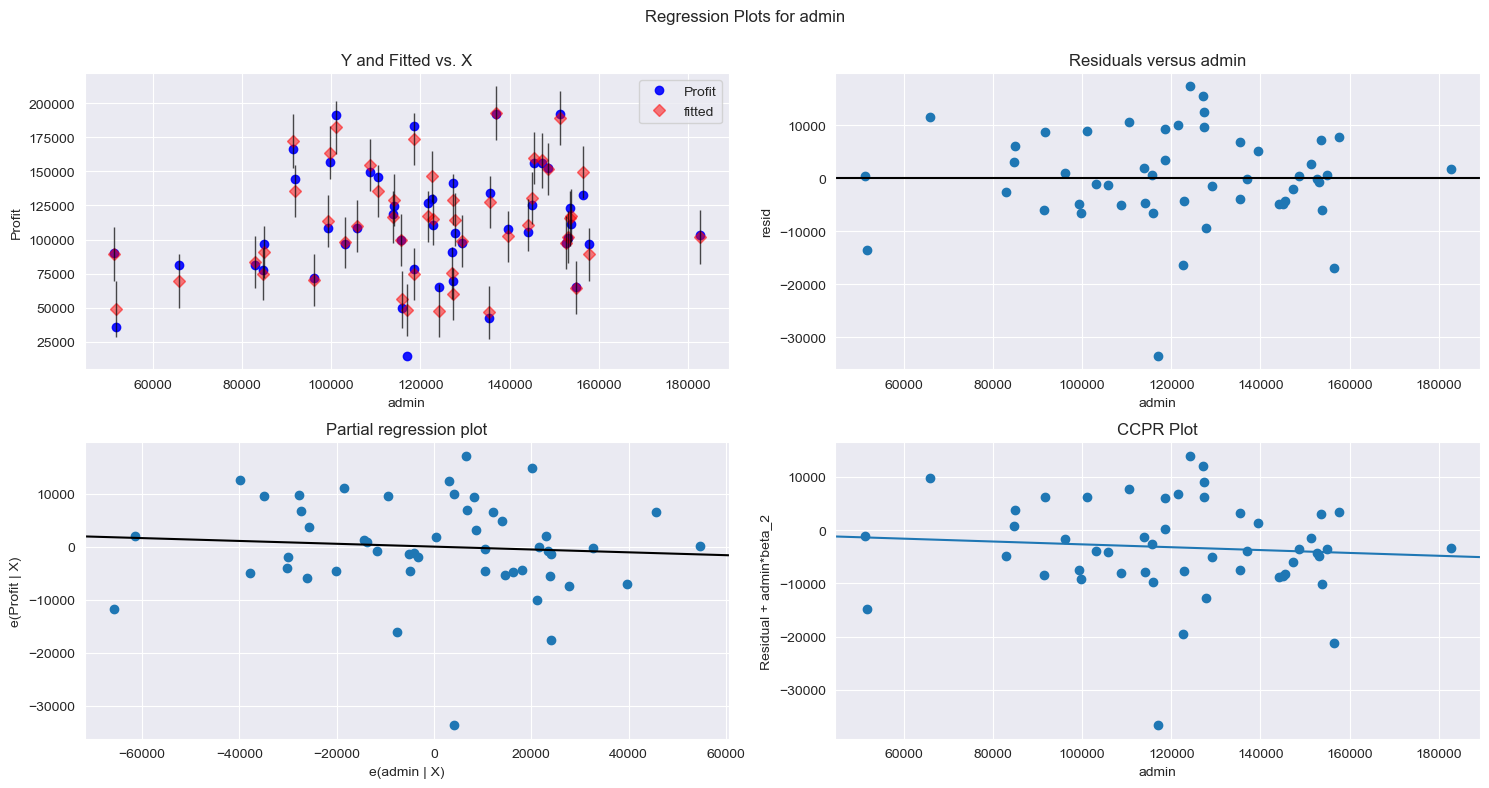

In [32]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'admin',fig= fig)
plt.show()

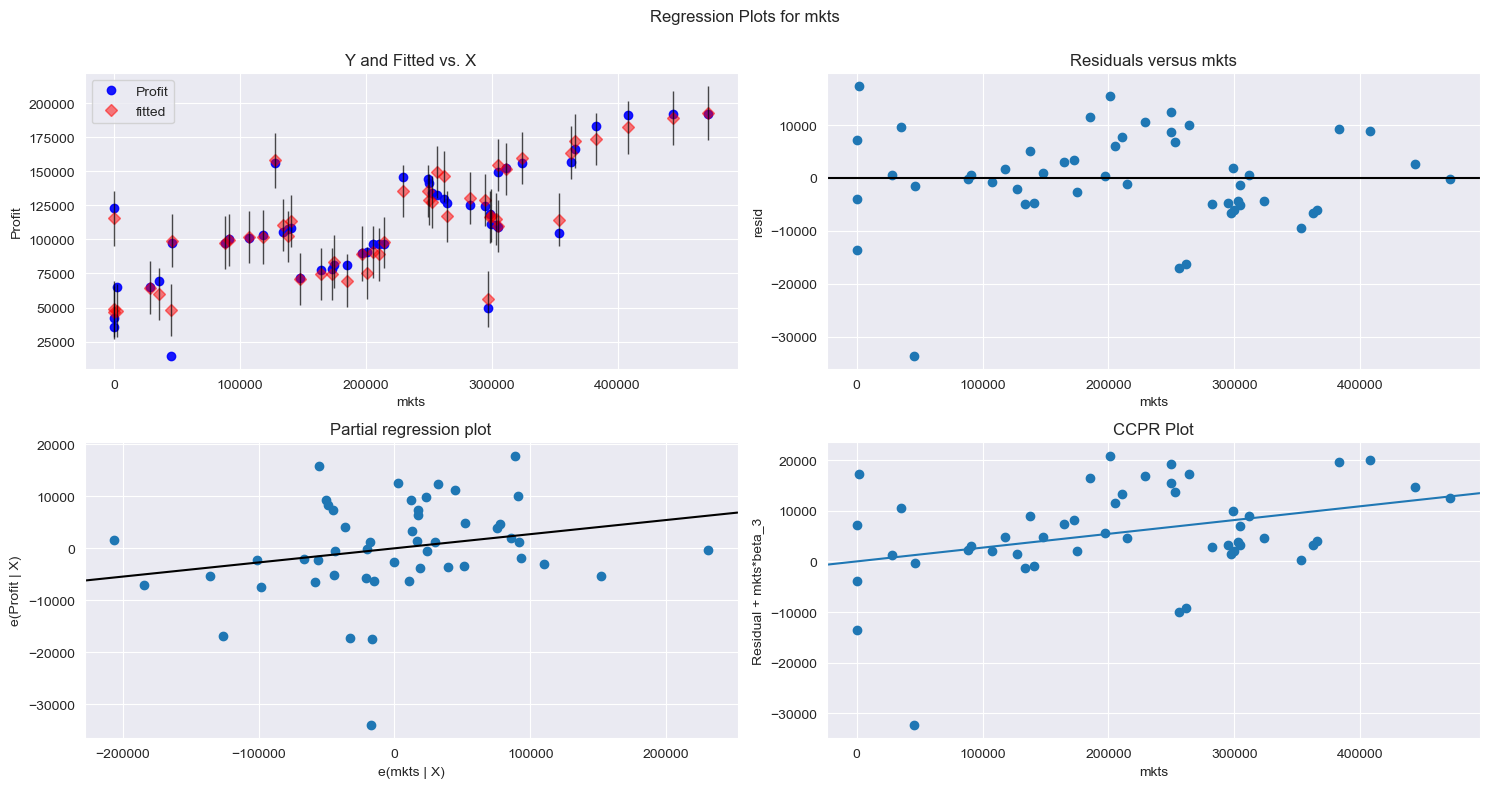

In [33]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'mkts',fig= fig)
plt.show()

## Model deletion 
## Two Techniques : 1. Cook's Distance & 2. Leverage value

In [37]:
# 1. Cook's Distance: If Cook's distance > 1, then it's an outlier
# Get influencers using cook's distance
(c,_) = model.get_influence().cooks_distance
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

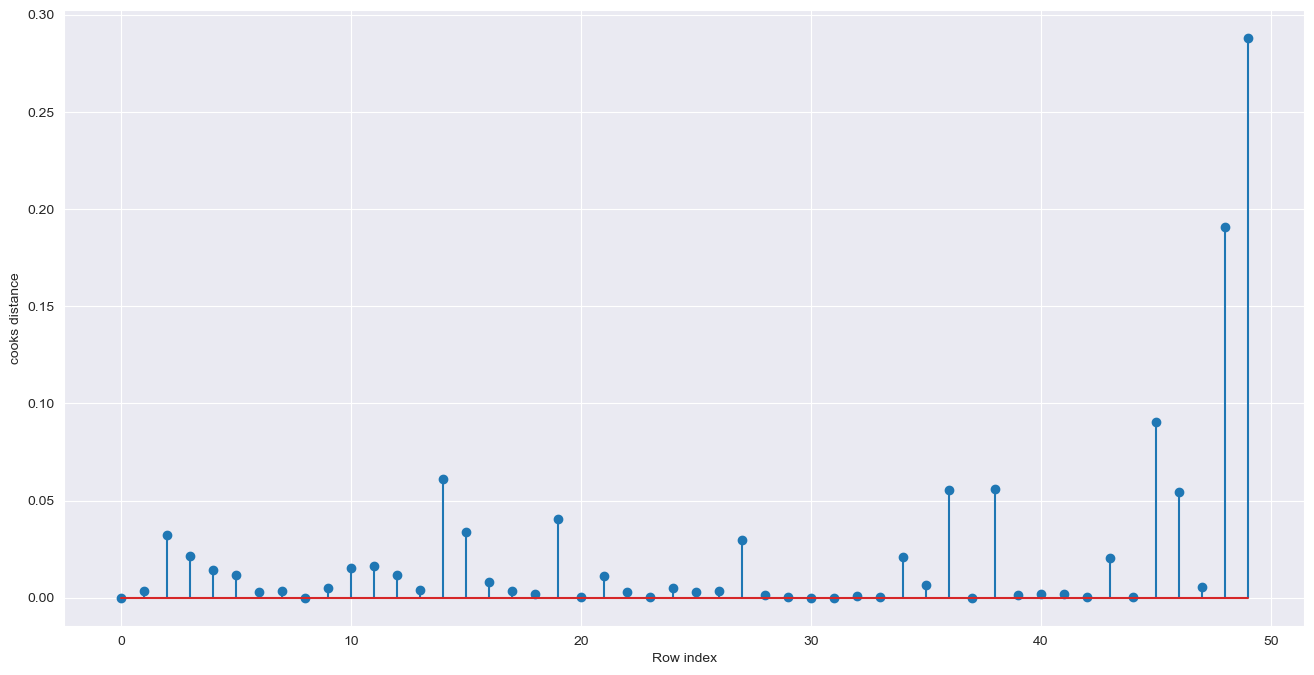

In [38]:
# Plot the influencers using the stem plot
fig = plt.figure(figsize = (16,8))
plt.stem(np.arange(len(data1)),np.round(c,5))
plt.xlabel("Row index")
plt.ylabel("cooks distance")
plt.show()

In [39]:
# index and value of influencer where c >0.5
np.argmax(c),np.max(c)

(49, 0.28808229275432634)

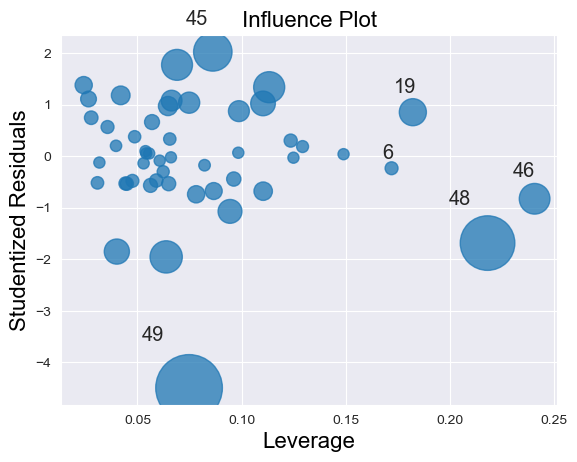

In [40]:
# 2. Leverage Value using High Influence Points : Points beyond Leverage_cutoff value are influencers
influence_plot(model)
plt.show()

In [42]:
# Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints
k = data1.shape[1]
n = data1.shape[0]
lev_cutoff = 3*(k+1)/n
lev_cutoff

0.3

In [43]:
data1[data1.index.isin([49])]

,rnd,admin,mkts,Profit
49,0.0,116983.8,45173.06,14681.4


## Improving the model

In [46]:
# Discard the data points which are influencers and reassign the row number (reset_index(drop=True))
data2 = data1.drop(data1.index[[49]],axis=0).reset_index(drop=True)
data2

,rnd,admin,mkts,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


## model deletion and final model

In [54]:
# taking cooksdistance value to prediction final model
while np.max(c)>0.5:
    model = smf.ols("Profit~rnd+admin+mkts",data=data2).fit()
    (c,_) = model.get_influence().cooks_distance
    c
    np.argmax(c), np.max(c)
    data2= data2.drop(data2.index[[np.argmax(c)]],axis=0).reset_index(drop= True)
    data2
else:
    final_model = smf.ols("Profit~rnd+admin+mkts",data=data2).fit()
    final_model.rsquared, final_model.aic
    print("the model accuracy is",final_model.rsquared)

the model accuracy is 0.9613162435129847


In [55]:
final_model.rsquared

0.9613162435129847

In [56]:
data2

,rnd,admin,mkts,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


## model predictions

In [58]:
# assuming new data
n_data = pd.DataFrame({'rnd':40000,'admin':50000,'mkts':60000},index=[0])
n_data

,rnd,admin,mkts
0,40000,50000,60000


In [59]:
#manual prediction
final_model.predict(n_data)

0    84106.46328
dtype: float64

In [60]:
# Automatic Prediction of Price with 90.02% accurcy
pred_y = final_model.predict(data2)
pred_y

0     190716.676999
1     187537.122227
2     180575.526396
3     172461.144642
4     170863.486721
5     162582.583177
6     157741.338633
7     159347.735318
8     151328.826941
9     154236.846778
10    135507.792682
11    135472.855621
12    129355.599449
13    127780.129139
14    149295.404796
15    145937.941975
16    117437.627921
17    130408.626295
18    129129.234457
19    116641.003121
20    117097.731866
21    117911.019038
22    115248.217796
23    110603.139045
24    114051.073877
25    103398.054385
26    111547.638935
27    114916.165026
28    103027.229434
29    103057.621761
30    100656.410227
31     99088.213693
32    100325.741335
33     98962.303136
34     90552.307809
35     91709.288672
36     77080.554255
37     90722.503244
38     71433.021956
39     85147.375646
40     76625.510303
41     76492.145175
42     72492.394974
43     62592.049718
44     67025.731107
45     50457.297206
46     58338.443625
47     49375.776655
48     51658.096812
dtype: float64

## table containing R^2 value for each prepared model

In [61]:
d2 = {'prep_model':['Model','Finalmodel'],'Rsquared':[model.rsquared,final_model.rsquared]}
table = pd.DataFrame(d2)
table

,prep_model,Rsquared
0,Model,0.950746
1,Finalmodel,0.961316


## From here we take the rsquared value for prediction the final model and increasing the accuracy

In [63]:
model2 = smf.ols("Profit~rnd+admin+mkts",data=data2).fit()
model2

In [64]:
np.max(c)

0.28808229275432634

In [70]:
while model2.rsquared<0.99:
    for c in [np.max(c)>1]:
        model2 = smf.ols("Profit~rnd+admin+mkts",data=data2).fit()
        (c,_) = model2.get_influence().cooks_distance
        c
        np.argmax(c), np.max(c)
        data2= data2.drop(data2.index[[np.argmax(c)]],axis=0).reset_index(drop= True)
        data2
    else:
        final_model2 = smf.ols("Profit~rnd+admin+mkts",data=data2).fit()
        final_model2.rsquared, final_model2.aic
        print("the improved model accuracy is",final_model2.rsquared)

the improved model accuracy is 0.9626766170294073
the improved model accuracy is 0.9614129113440602
the improved model accuracy is 0.962593650298269
the improved model accuracy is 0.9638487279209415
the improved model accuracy is 0.9663901957918793
the improved model accuracy is 0.9706076169779905
the improved model accuracy is 0.9727840588916423
the improved model accuracy is 0.9734292907181952
the improved model accuracy is 0.9785801571833451
the improved model accuracy is 0.9777383743090916
the improved model accuracy is 0.9790510088977512
the improved model accuracy is 0.9790004461890552
the improved model accuracy is 0.9807878666153609
the improved model accuracy is 0.9838299343609735
the improved model accuracy is 0.9831149926392769
the improved model accuracy is 0.9833768520972176
the improved model accuracy is 0.9878892536376698
the improved model accuracy is 0.9877191935547199
the improved model accuracy is 0.9858356627471713
the improved model accuracy is 0.9874766829880098
t

In [71]:
final_model2.rsquared

0.9882757054424702

In [72]:
data2

,rnd,admin,mkts,Profit
0,142107.34,91391.77,366168.42,166187.94
1,131876.90,99814.71,362861.36,156991.12
2,130298.13,145530.06,323876.68,155752.60
3,120542.52,148718.95,311613.29,152211.77
4,123334.88,108679.17,304981.62,149759.96
5,91992.39,135495.07,252664.93,134307.35
6,94657.16,145077.58,282574.31,125370.37
7,91749.16,114175.79,294919.57,124266.90
8,76253.86,113867.30,298664.47,118474.03
9,67532.53,105751.03,304768.73,108733.99


In [73]:
# model prediction for final_model2
new_data_final = pd.DataFrame({'rnd':40000,'admin':50000,'mkts':60000},index=[0])
new_data_final

,rnd,admin,mkts
0,40000,50000,60000


In [74]:
final_model2.predict(new_data_final)

0    79246.994098
dtype: float64

In [75]:
# Automatic Prediction of Price with 90.02% accurcy
pred_x = final_model2.predict(data2)
pred_x

0     165589.539700
1     158552.826483
2     156789.000710
3     149524.698853
4     150122.356712
5     126598.769555
6     130104.785747
7     127878.387928
8     117298.757074
9     111329.242429
10    110009.916133
11    102331.717613
12    109661.804131
13    103462.767086
14    101874.612012
15     97655.794577
16     97872.919535
17     96858.382686
18     98654.449007
19     93583.600868
20     91186.568204
21     88571.938968
22     84521.312916
23     78528.002935
24     76670.262623
25     73237.524757
26     68075.710756
dtype: float64

## table containing R^2 value for each prepared model

In [77]:
d3 = {'prep_model':['Model','Finalmodel'],'Rsquared':[model.rsquared,final_model2.rsquared]}
table1 = pd.DataFrame(d3)
table1

,prep_model,Rsquared
0,Model,0.950746
1,Finalmodel,0.988276
